<a href="https://colab.research.google.com/github/tiadwi/first-mlproject/blob/master/Fruit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.datasets import load_files

from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/My Drive"

'5 why.gdoc'
'Annual budget.gsheet'
 Assignment#06-DataPerparation-TiaDwiSetiani.pptx
'[Bangk!t] Assignment #00 - W00 - Problem Framing Example Docs - Google Docs.pdf'
'Berkas - Berkas'
'Catatan Air 2020.gsheet'
'Catatan Air SSP 2020.gsheet'
 Certifications
'Colab Notebooks'
'Expense report.gsheet'
'Financial statements.gsheet'
'fruit classification'
'Fruits and Vegetable Classification.gslides'
'Fruits and Vegetable Classification.pptx'
'Fruits Classification - Maharani D Pramita - Tia D Setiani.pdf'
'Go Academy.gdoc'
'Google Bangkit'
'Image Classification'
 IMG_20200421_111121.jpg
'Invoice (1).gsheet'
 Invoice.gsheet
'Irma Nurul Fatimah - Biografi.docx'
'Irma Nurul Fatimah - Biografi.gdoc'
'JONAS Wisuda Wdi'
 Keenan
'Laporan Biaya Perbaikan Pompa Pusat.gsheet'
'Laporan Perbaikan Pompa Torn Pusat 2018.gsheet'
'Learning Journey'
'Mathematics for Machine Learning.pdf'
'Monthly budget.gsheet'
 Others
'Outing Event Proposal.gslides'
'P-Faces for Time Mangement.gdoc'
'Problem Framing - Wor

In [0]:
train_dir = '/content/gdrive/My Drive/Image Classification/Training'
test_dir = '/content/gdrive/My Drive/Image Classification/Test'

In [0]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [6]:
X_train, y_train, target_labels = load_dataset(train_dir)
X_test, y_test, _ = load_dataset(test_dir)
print("Data Loaded")

Data Loaded


In [7]:
print('Training set size', X_train.shape)
print('Testing set size', X_test.shape)

Training set size (5367,)
Testing set size (1785,)


In [8]:
X_test.shape

(1785,)

In [9]:
total_class = len(np.unique(y_train))
total_class

10

In [10]:
print(y_train[0:11])

[7 3 9 8 4 2 7 3 4 9 1]


In [11]:
y_train = np_utils.to_categorical(y_train, total_class)
y_test = np_utils.to_categorical(y_test, total_class)

print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
X_test, X_valid = X_test[750:], X_test[:750]
y_test, y_valid = y_test[750:], y_test[:750]

print(X_test.shape, X_valid.shape)
print(y_test.shape, y_valid.shape)

(1035,) (750,)
(1035, 10) (750, 10)


In [13]:
X_train[0]

'/content/gdrive/My Drive/Image Classification/Training/Pepper Yellow/98_100.jpg'

In [14]:
print(target_labels)
print(X_train[0])
print(y_train[0])

['Apple Red 1' 'Avocado' 'Banana' 'Blueberry' 'Cauliflower' 'Grape White'
 'Onion Red' 'Pepper Yellow' 'Potato Sweet' 'Tomato 3']
/content/gdrive/My Drive/Image Classification/Training/Pepper Yellow/98_100.jpg
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
def convert_image_to_array(files):
    array_img = []
    for file in files:
        array_img.append(img_to_array(load_img(file)))
    return np.array(array_img)

In [16]:
X_train = convert_image_to_array(X_train)
X_valid = convert_image_to_array(X_valid)
X_test = convert_image_to_array(X_test)

print(X_train.shape, X_valid.shape, X_test.shape)

(5367, 100, 100, 3) (750, 100, 100, 3) (1035, 100, 100, 3)


In [17]:
X_train[0]

array([[[255., 254., 251.],
        [252., 255., 255.],
        [248., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 253., 255.],
        [254., 255., 255.],
        [249., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 255., 255.],
        [255., 255., 253.],
        [255., 255., 251.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [0]:
X_train = X_train.astype('float32')/255
X_valid = X_valid.astype('float32')/255
X_test = X_test.astype('float32')/255

In [19]:
X_train[0]

array([[[1.        , 0.99607843, 0.9843137 ],
        [0.9882353 , 1.        , 1.        ],
        [0.972549  , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 0.99215686, 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.9843137 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

# **Visualization**

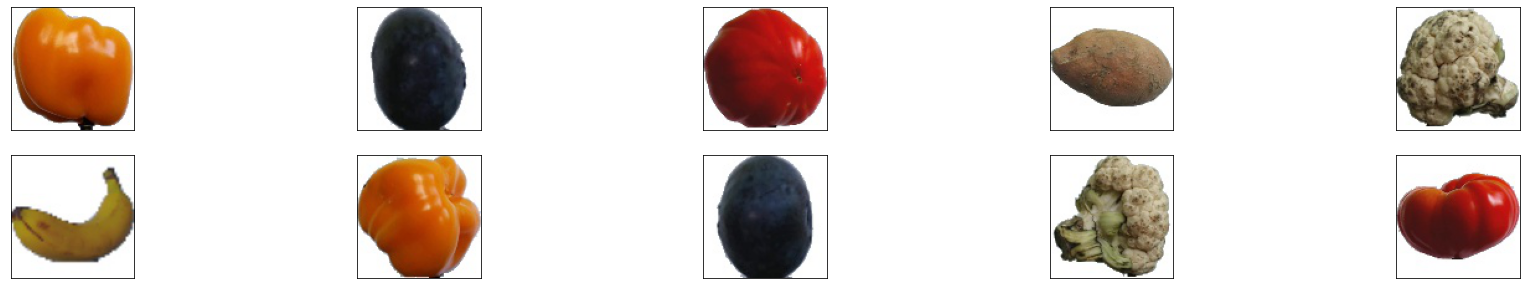

In [20]:
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

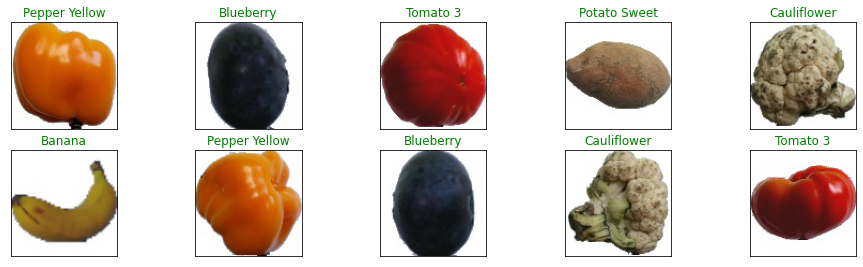

In [21]:
fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])    
    ax.imshow(np.squeeze(X_train[i]))
    true_idx = np.argmax(y_train[i])
    ax.set_title("{}".format(target_labels[true_idx]), color="green")

# **Training Model**

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [23]:
model = Sequential()

model.add(Conv2D(input_shape=(100,100,3), filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
checkpoint = ModelCheckpoint(filepath='cnn_basic_fruit.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint])

Train on 5367 samples, validate on 750 samples
Epoch 1/50
5367/5367 [==============================] - 37s 7ms/step - loss: 0.4100 - accuracy: 0.8545 - val_loss: 0.0634 - val_accuracy: 0.9680

Epoch 00001: val_loss improved from inf to 0.06340, saving model to cnn_basic_fruit.hdf5
Epoch 2/50
5367/5367 [==============================] - 36s 7ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0768 - val_accuracy: 0.9707

Epoch 00002: val_loss did not improve from 0.06340
Epoch 3/50
5367/5367 [==============================] - 37s 7ms/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0369 - val_accuracy: 0.9800

Epoch 00003: val_loss improved from 0.06340 to 0.03692, saving model to cnn_basic_fruit.hdf5
Epoch 4/50
5367/5367 [==============================] - 36s 7ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0135 - val_accuracy: 0.9920

Epoch 00004: val_loss improved from 0.03692 to 0.01347, saving model to cnn_basic_fruit.hdf5
Epoch 5/50
5367/5367 [=====================

In [0]:
model.load_weights('cnn_basic_fruit.hdf5')

In [28]:
acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc[1])

1035/1035 [==============================] - 3s 2ms/step
Test accuracy: 1.0
